# MLP numpy

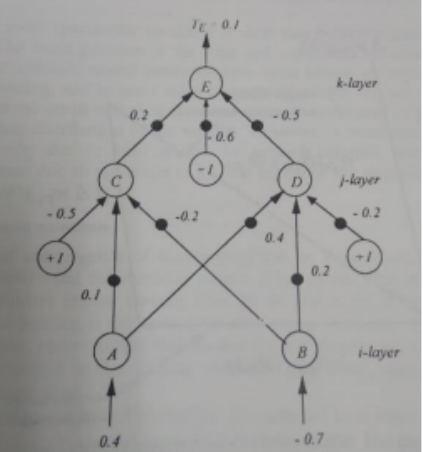

In [ ]:
import numpy as np

## Clase para crear capas

In [ ]:
class Layer:
    
    def __init__(self, w_initials: list, alpha: int = 1) -> None:
        
        self.functions = (lambda z: 1 / (1 + np.exp(-z * alpha)),
                          lambda z: z * (1 - z))

        self.w = w_initials["w"]
        
        self.b = np.array(w_initials["b"])
        
        self.bias = 1
    
    def __repr__(self) -> str:

        return f"W: {self.w}, B: {self.b}"

## Clase para crear el MLP

In [ ]:
class MLP:
    
    def __init__(self, layers: int, w_initials: dict, learning_rate: float) -> None:

        self.layers = layers
        self.w_initials = w_initials
        self.model = self.create_layers()
        self.lr = learning_rate
  
    def create_layers(self) -> np.array:

        mlp = list()
    
        for index in range(self.layers):
            
            mlp.append(Layer(self.w_initials[index]))
        
        return np.array(mlp)
    
    def error(self, y_true: np.array, y_pred: np.array) -> np.array:
        
        return np.power((y_pred - y_true), 2) / 2
    
    def deriv_error(self, y_true: np.array, y_pred: np.array) -> np.array:
        
        return (y_pred - y_true)
    
    def fowardpass(self, X: np.array, layer: int) -> list:
        
    
        z = np.dot(X, self.model[layer].w) + (self.model[layer].b * self.model[layer].bias)
    
        out = self.model[layer].functions[0](z)

        return z, out
    
    def backwardpass(self,out: np.array, Y: np.array,layer: int,
                     delta: list, _w = None) -> np.array:
        
        if layer == len(self.model) - 1:
            
            delta = self.deriv_error(Y, out) * self.model[layer].functions[1](out)
            
            return delta
            
        else:
            
            delta = np.dot(delta[0], _w.T) * self.model[layer].functions[1](out)
            
            return delta
    
    def w_update(self, layer: int, deltas: list, out: np.array,) -> np.array:
        
        self.model[layer].b -= np.mean(deltas[0], axis = 0, keepdims = True) * self.lr
        
        self.model[layer].w -= np.dot(out.T, deltas[0]) * self.lr

    def train(self, X: np.array, Y: np.array, epochs: int) -> None:
    
        for epoch in range(0, epochs):
            
            out = X
            out_values = [(None, X)]
            deltas = list()
            _w = []
            
            for layer in range(0, self.layers):
    
                z, out = self.fowardpass(out, layer)
        
                out_values.append((z, out))
            
            for layer in reversed(range(0, self.layers)):
                
                z_back = out_values[layer + 1][0]
                 
                out_back = out_values[layer + 1][1]
                
                if len(_w) != 0:
                    
                    delta = self.backwardpass(out_back, Y, layer, deltas, _w)
                
                else:
                    
                    delta = self.backwardpass(out_back, Y, layer, deltas)
                     
                deltas.insert(0, delta)
                
                _w = self.model[layer].w
                
                self.w_update(layer, deltas, out_back)
            
            print(f"Epoca: {epoch + 1}, Error: {self.error(Y, out)[0][0]}, y_pred: {out[0][0]}")
            

## Parametros iniciales y dataset

In [ ]:
w_initials = [{"w": np.array([[0.1, 0.4],
                              [-0.2, 0.2]]),
               
               "b": np.array([[-0.5, 0 -0.2]])
               },
              
              {"w": np.array([[0.2],
                              [-0.5]]),
               
               "b": np.array([[-0.6]])
               }]

X = np.array([0.4, -0.7])
Y = np.array([0.1])

X = X.reshape(1,2)
Y = Y.reshape(1,1)

In [ ]:
model = MLP(2, w_initials, 0.5)

print("Pesos iniciales:\n", model.model)

Pesos iniciales:
 [W: [[ 0.1  0.4]
 [-0.2  0.2]], B: [[-0.5 -0.2]]
 W: [[ 0.2]
 [-0.5]], B: [[-0.6]]]


In [ ]:
model.train(X, Y, 10)

Epoca: 1, Error: 0.02469876625372154, y_pred: 0.3222555567526785
Epoca: 2, Error: 0.023202031597092086, y_pred: 0.3154160235316402
Epoca: 3, Error: 0.021833017252614058, y_pred: 0.30896419431383004
Epoca: 4, Error: 0.020578097504700847, y_pred: 0.3028698967550427
Epoca: 5, Error: 0.019425322450736637, y_pred: 0.2971056693793288
Epoca: 6, Error: 0.01836419511635764, y_pred: 0.2916465241863658
Epoca: 7, Error: 0.017385478394731264, y_pred: 0.28646972083816324
Epoca: 8, Error: 0.016481028328553436, y_pred: 0.2815545555944738
Epoca: 9, Error: 0.015643650408033602, y_pred: 0.2768821664726753
Epoca: 10, Error: 0.014866975825740508, y_pred: 0.2724353549927654


In [ ]:
print("Pesos finales:\n", model.model)

Pesos finales:
 [W: [[ 0.09654561  0.41135049]
 [-0.20376323  0.21237334]], B: [[-0.50822641 -0.17296513]]
 W: [[ 0.1393876]
 [-0.5606124]], B: [[-0.80384729]]]
